# **Wine Rating & Price**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("budnyak/wine-rating-and-price")

print("Path to dataset files:", path)

100%|██████████| 345k/345k [00:00<00:00, 62.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/budnyak/wine-rating-and-price/versions/1


Предобработаем данные и соединим все типы вин в один датасет

In [4]:
red = pd.read_csv('/root/.cache/kagglehub/datasets/budnyak/wine-rating-and-price/versions/1/Red.csv')
white = pd.read_csv('/root/.cache/kagglehub/datasets/budnyak/wine-rating-and-price/versions/1/White.csv')
sparkling = pd.read_csv('/root/.cache/kagglehub/datasets/budnyak/wine-rating-and-price/versions/1/Sparkling.csv')
rose = pd.read_csv('/root/.cache/kagglehub/datasets/budnyak/wine-rating-and-price/versions/1/Rose.csv')

In [5]:
red['WineStyle'] = 'red'
white['WineStyle'] = 'white'
sparkling['WineStyle'] = 'sparkling'
rose['WineStyle'] = 'rose'
wines =  pd.concat([red, white, sparkling, rose], ignore_index=True)

In [6]:
wines.head(30)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017,red
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016,red
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014,red
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015,red
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014,red


Name - название вина

Country - страна производства

Regiоn - регион производства

Winery - винодельная(название компании производителя)

Rating - рейтинг вина по шкале от 0 до 5

Number of ratings - количество всех оценок этого вина

Price - цена

Year - год производства

WineStyle - тип вина - красное, белое, розовое или игристое

Пропусков в данных нет

In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   WineStyle        13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [8]:
wines.isna().sum()

,0
Name,0
Country,0
Region,0
Winery,0
Rating,0
NumberOfRatings,0
Price,0
Year,0
WineStyle,0


In [9]:
wines.isnull().sum()

,0
Name,0
Country,0
Region,0
Winery,0
Rating,0
NumberOfRatings,0
Price,0
Year,0
WineStyle,0


Построим графики распределения количества вин в зависимости от страны производства, а также распределения количества рейтингов

<ipython-input-10-b4fc7561f417>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=45)


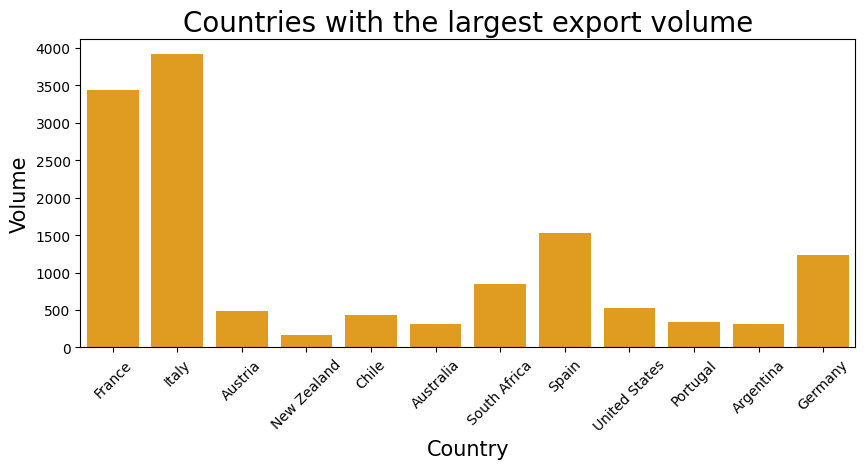

In [10]:
major_countries = wines.Country.value_counts()[:12]

plt.figure(figsize=(10,4))

country = wines.Country.value_counts()[:12]

graph = sns.countplot(x='Country', data=wines[wines.Country.isin(major_countries.index.values)], color = 'orange')
graph.set_title("Countries with the largest export volume", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Volume", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

plt.show()

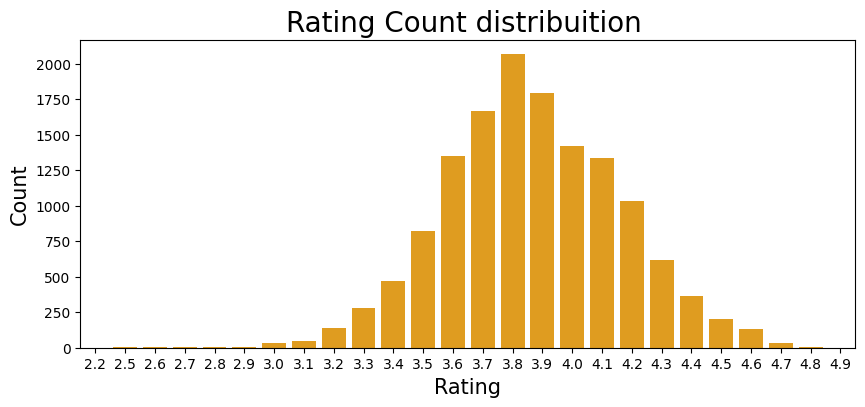

In [11]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='Rating', data=wines, color = 'orange')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15)
graph.set_ylabel("Count", fontsize=15)
plt.show()

In [12]:
wines['Year'].unique()

array(['2011', '2017', '2015', '2019', '2016', '2014', '2013', '2018',
       '2012', '2010', '2007', '2005', '1999', '2002', '2008', '2006',
       '2009', 'N.V.', '2000', '2004', '2001', '1996', '1998', '1990',
       '1995', '2003', '1993', '1988', '1989', '1997', '1992', '1991',
       '2020', '1961'], dtype=object)

In [13]:
wines.groupby(['Year'])['Year'].count()

,Year
Year,
1961,3
1988,1
1989,2
1990,2
1991,1
1992,3
1993,2
1995,4
1996,6


Тип данных в столбце Year - object, т.к. дата производства некоторых вин неизвестна, а точнее, N.V. - non vintage, то есть они произведены не так давно. Последнее датируемое вино - 2020 года производства, при этом для анализа распределения года производства нам нужно привести все данные к одному типу. Для этого заменим неизвестную нам дату создания на медианную, т.к. таких неизвестных значений всего 774 из 13834 (около 5%). Получаем, что среднее значение и медианное у года производства также достаточно близки, а среднее значение попадает в 25% квантиль. Также проверим год производства на нормальность

Средний рейтинг и его медиана достаточно близки - 3,86 и 3,9, поэтому проверим распределение рейтинга на нормальность

У количества людей, оставивших рейтинг, среднее и медиана различаются более чем в 2 раза. Можем предположить, что покупатели охотнее покупают и ставят рейтинг тем винам, которые уже имеют какое-то количество оценок, а вина без рейтинга не покупают, то есть популярным винам ставят больше оценок. Скорее всего, в датасетe поэтому и отсутствуют вина с небольшим количеством оценок (меньше 25). Поэтому можно ожидать, что распределение по количеству оценок будет ненормальным.

Распределение цены скорее всего также ненормально, средняя и медианная цены отличаются более чем в 2 раза. При этом стоит отдельно проанализировать зависимость цены и рейтинга от года производства и зависимость рейтинга от цены

In [14]:
years = wines['Year']
years = years[years != 'N.V.'].astype(float)
years.median()

2016.0

In [15]:
wines['Year'] = wines['Year'].replace(['N.V.'], ['2016'])
wines['Year'] = wines['Year'].astype(float)

In [16]:
wines.describe()

,Rating,NumberOfRatings,Price,Year
count,13834.000000,13834.000000,13834.000000,13834.000000
mean,3.865664,428.322466,33.024850,2015.556961
std,0.296427,1838.413812,70.899893,3.188885
min,2.200000,25.000000,3.150000,1961.000000
25%,3.700000,56.000000,9.902500,2015.000000
50%,3.900000,129.000000,15.950000,2016.000000
75%,4.100000,336.000000,32.500000,2018.000000
max,4.900000,94287.000000,3410.790000,2020.000000


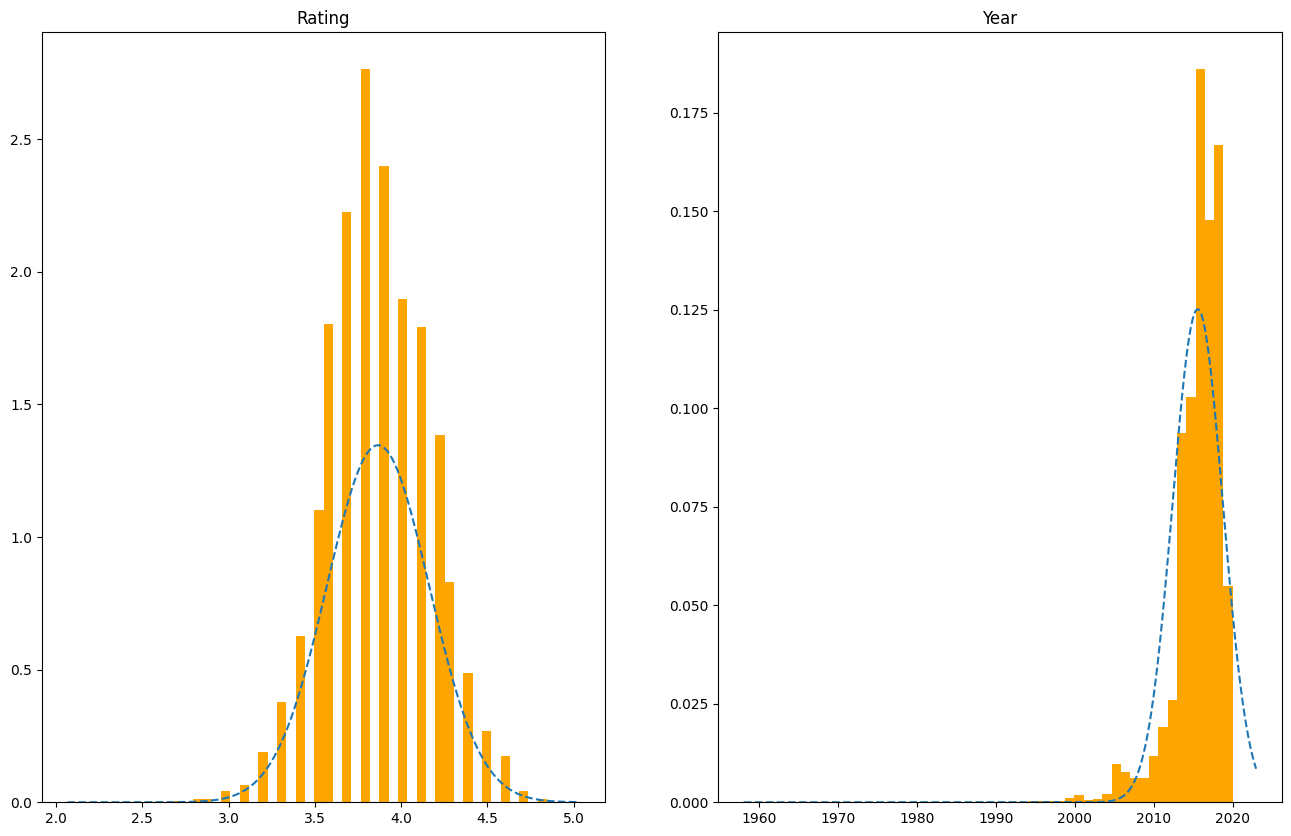

In [17]:
keys = ['Rating','Year']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 10)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(wines[key], density=True, bins=50, color = 'orange')

    loc = wines[key].mean()
    scale = wines[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

<ipython-input-18-65fb3f055ff5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels())


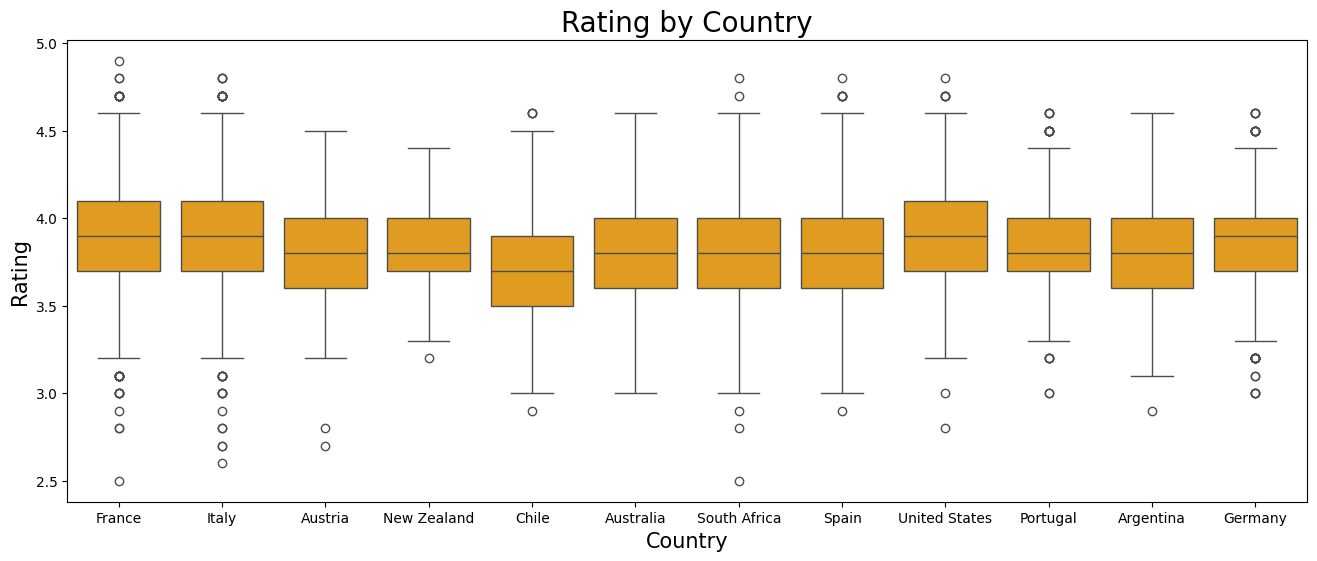

In [18]:
plt.figure(figsize=(16,6))

country = wines.Country.value_counts()[:12]

graph = sns.boxplot(x='Country', y='Rating', data=wines[wines.Country.isin(wines.Country.value_counts()[:12].index.values)], color = 'orange')
graph.set_title("Rating by Country", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

<ipython-input-19-821e11bc9f14>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
<ipython-input-19-821e11bc9f14>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


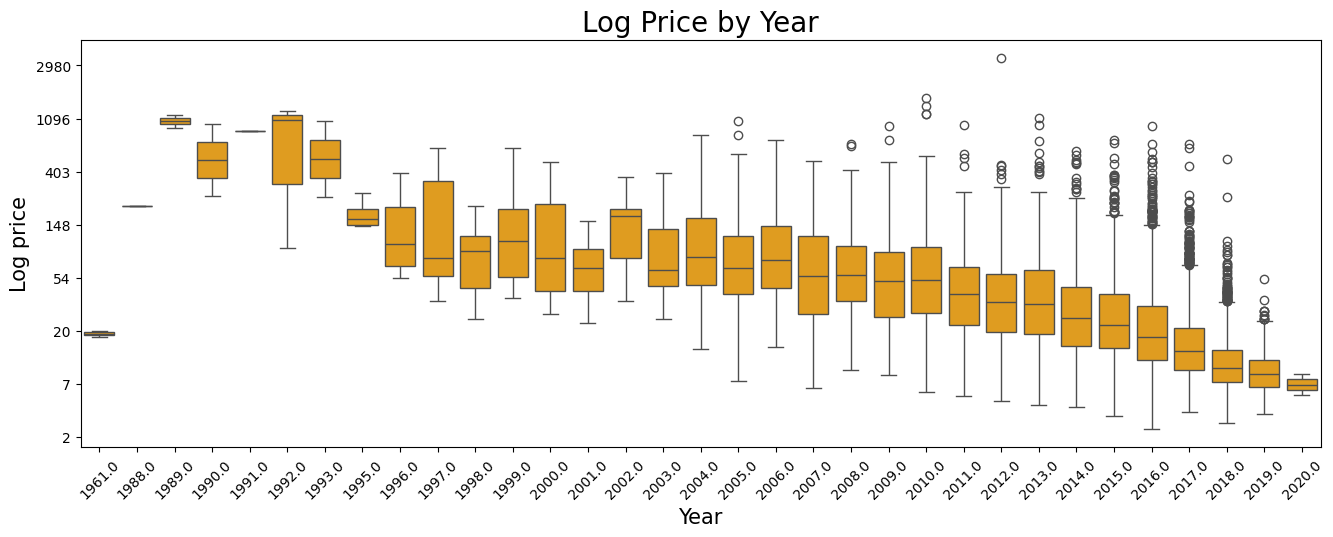

In [19]:
plt.figure(figsize=(16,18))

plt.subplot(3,1,1)
graph = sns.boxplot(x='Year', y=np.log(wines['Price']), data=wines, color = 'orange')
graph.set_title("Log Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Log price", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.show()

Построим графики распределения количества оценок и цены, а также логарифма количества оценок и цены

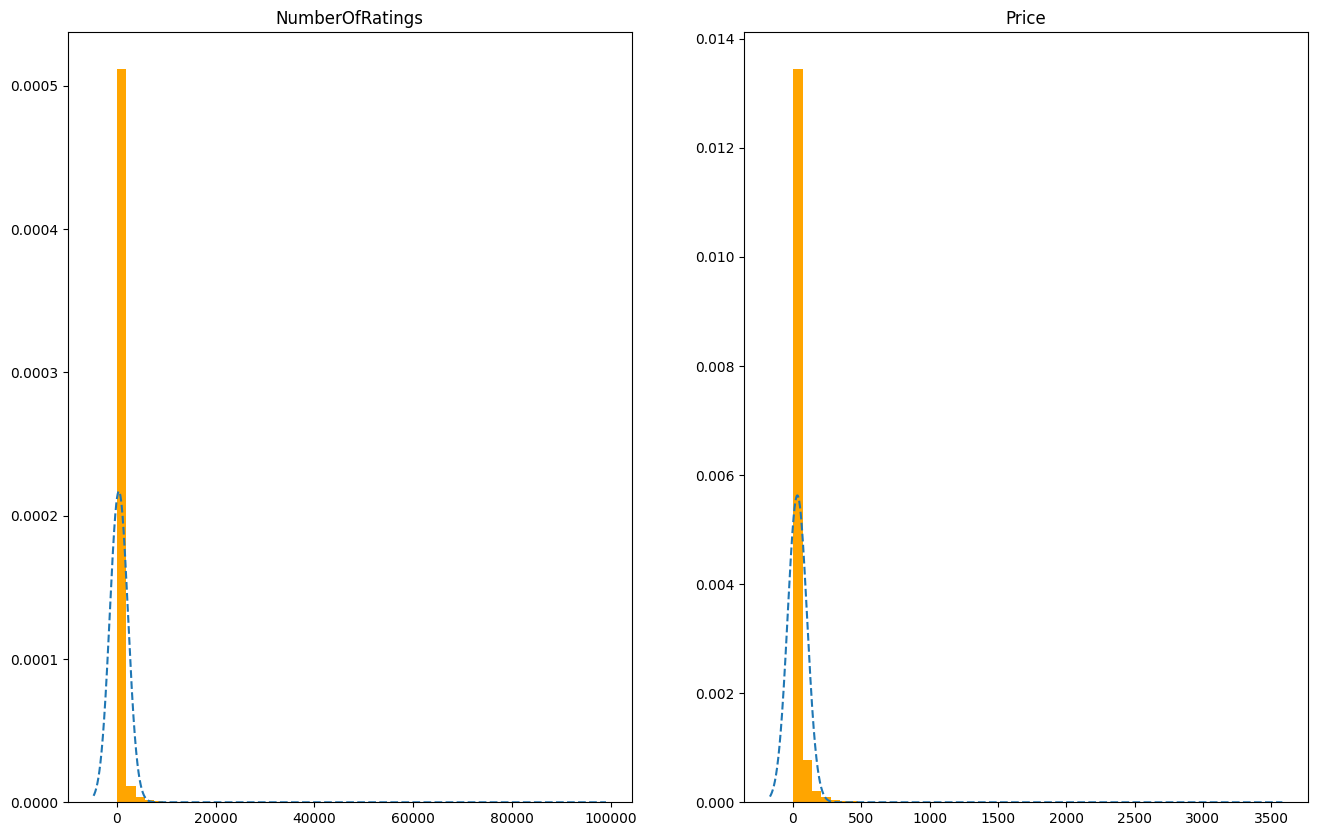

In [20]:
keys = ['NumberOfRatings', 'Price']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 10)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(wines[key], density=True, bins=50, color = 'orange')

    loc = wines[key].mean()
    scale = wines[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

<ipython-input-21-97678731560f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))


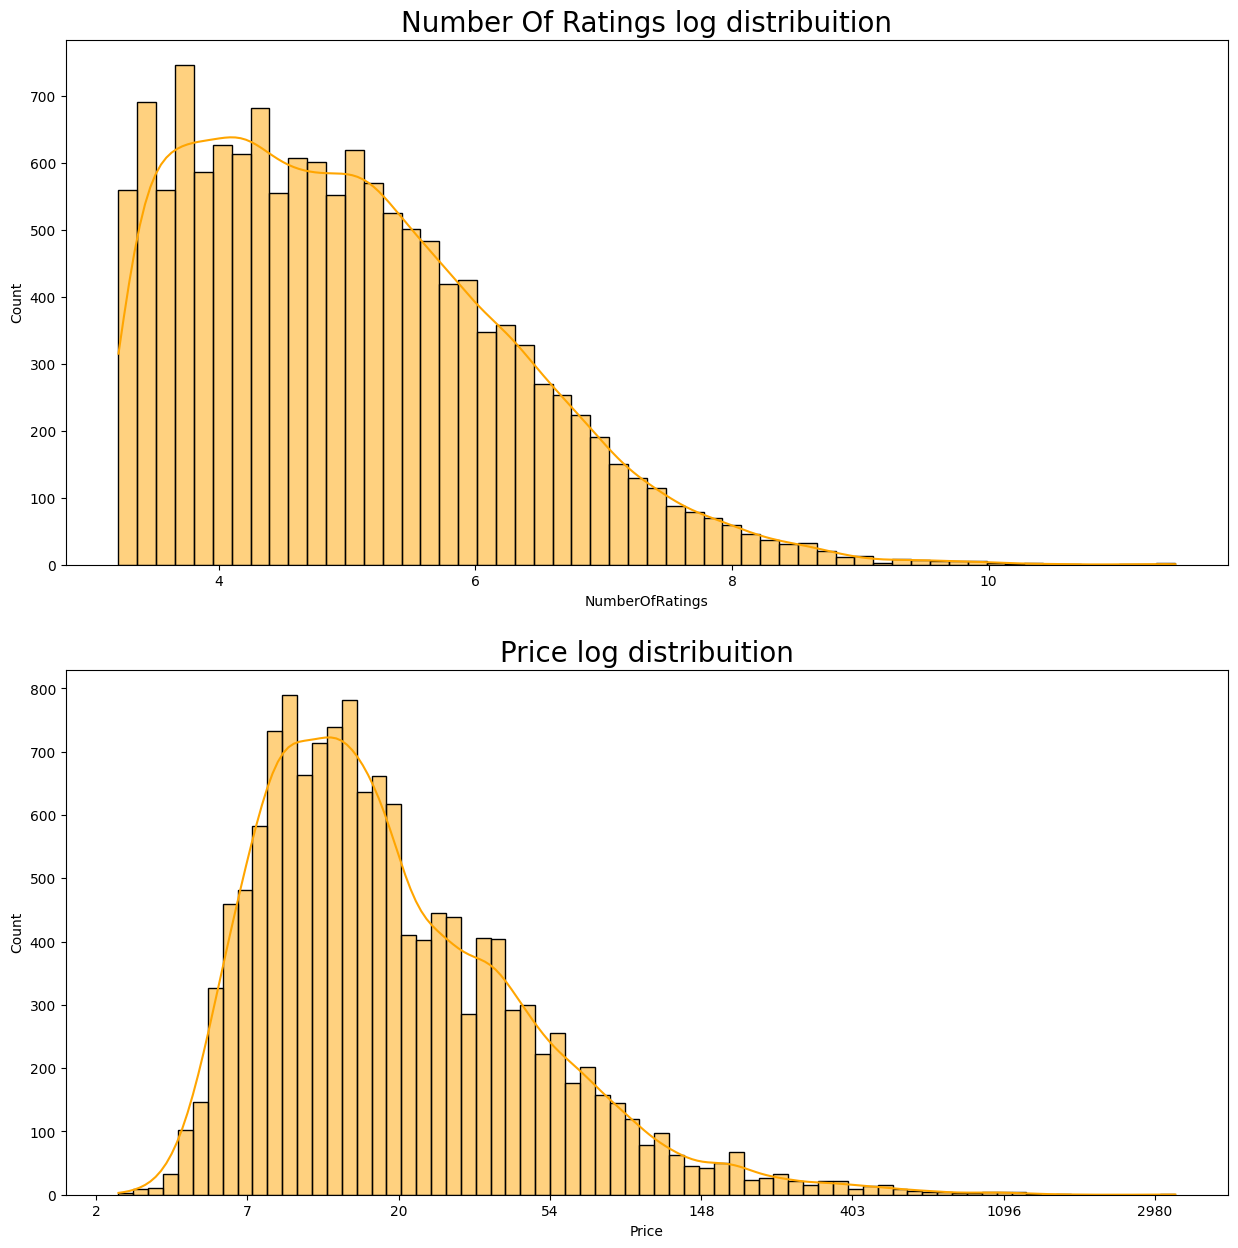

In [21]:
plt.figure(figsize=(15,15))


plt.subplot(2,1,1)
graph = sns.histplot(np.log(wines['NumberOfRatings']), kde = True, color='orange')
graph.set_title("Number Of Ratings log distribuition", fontsize=20)

plt.subplot(2,1,2)
graph1 = sns.histplot(np.log(wines['Price']), kde = True, color='orange')
graph1.set_title("Price log distribuition", fontsize=20)
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.show()

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

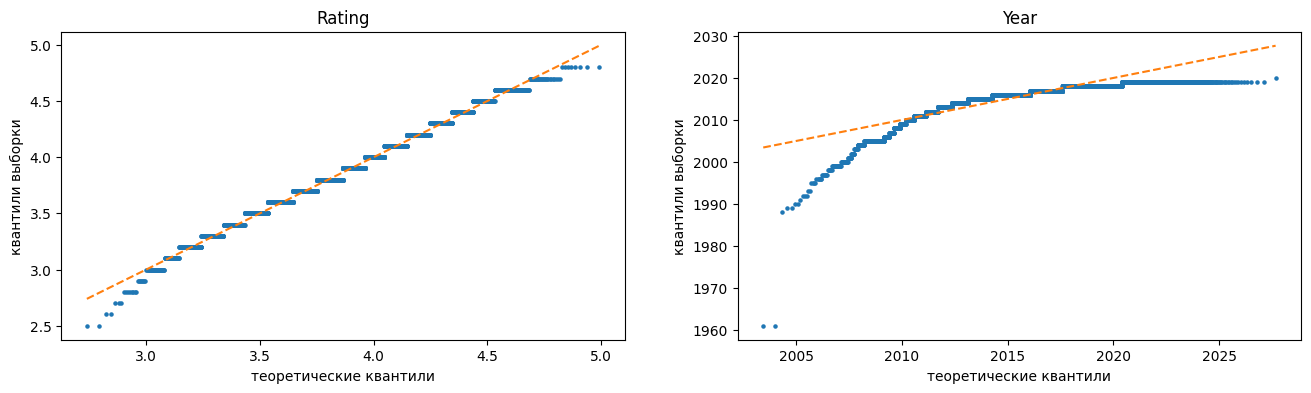

In [22]:
keys = ['Rating','Year']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = wines[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

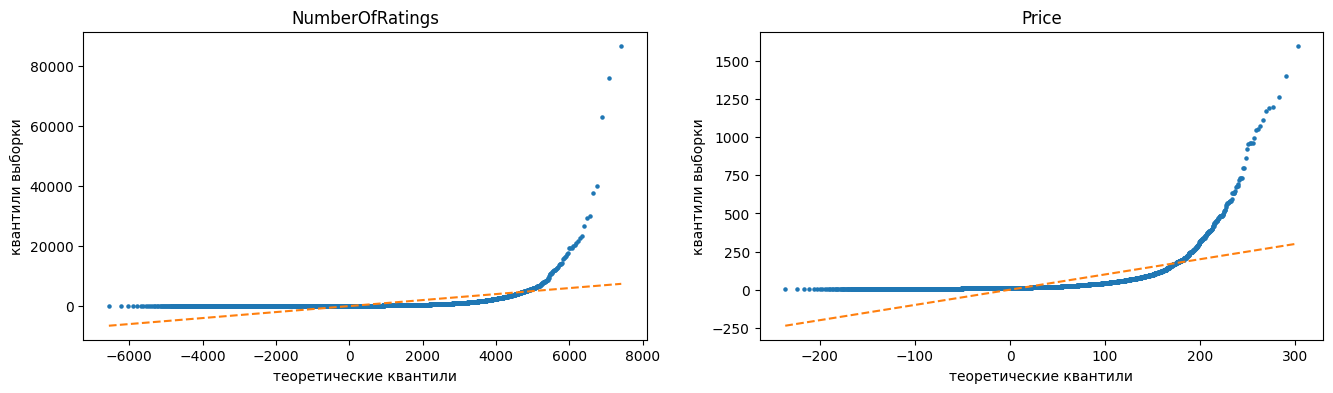

In [23]:
keys = ['NumberOfRatings', 'Price']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = wines[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Ориентируясь на графики, видим, что year и price распределены не нормально, при этом rating и number of ratings распределены относительно нормально, но с сильными выбросами

Оценим нормальность выборок также на основании известных характеристик нормального распределения, видим, что расчет для рейтинга достаточно близок к нормальному. Number of ratings также близок, но имеет сильные выпады. При этом year и price далеки от нормального распределения, что было ожидаемо. Далее рассмотрим несколько гипотез о возможной взаимосвязи этих трех величин - year, price и rating

In [24]:
keys = ['Rating','Year', 'NumberOfRatings', 'Price']

for key in keys:
    print(key)

    samples = wines[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()


Rating
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.695677316755819
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9553274540985977
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9976145727916726

Year
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8226109585080237
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9543154546768831
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9777360127222784

NumberOfRatings
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9715917305190112
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9879282926124042
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9936388607777938

Price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9537371692930461
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9773745843573803
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9864825791528119



Убеждаемся, что значения рейтинга распределены нормально

Есть ли зависимость между рейтингом и стоимостью вина?

In [25]:
def sum(samples: np.ndarray) -> float:
    return (samples** 2).sum()


def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [26]:
ones = np.ones((13834,1))
x_pot = np.hstack((ones, wines['Price'].values.reshape(13834,1)))

XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(wines['Rating'])
z = x_pot.dot(b)
e = wines['Rating'] - z

In [27]:
R = np.sqrt(1 - sum(e) / sum_of_squares(np.array(wines['Rating'])))
R

0.4506538996886248

Видим, что зависимость между ценой и рейтингом все-таки есть, визуализируем эту зависимость. Также проверим это утверждение также с помощью статистического теста

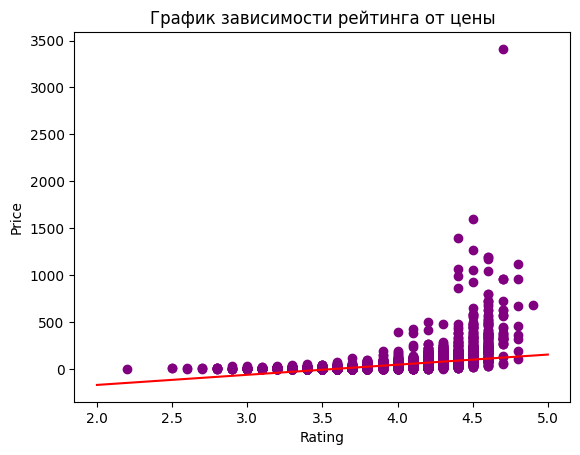

In [39]:
b1 = np.cov(wines['Rating'], wines['Price'], ddof=1)[0, 1] / np.var(wines['Rating'], ddof=1)
b0 = wines['Price'].mean() - b1 * wines['Rating'].mean()
x = np.linspace(2, 5)

plt.scatter(wines['Rating'], wines['Price'], color = 'purple')
plt.title('График зависимости рейтинга от цены')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.plot(x, b1*x + b0, color='red')
plt.show()

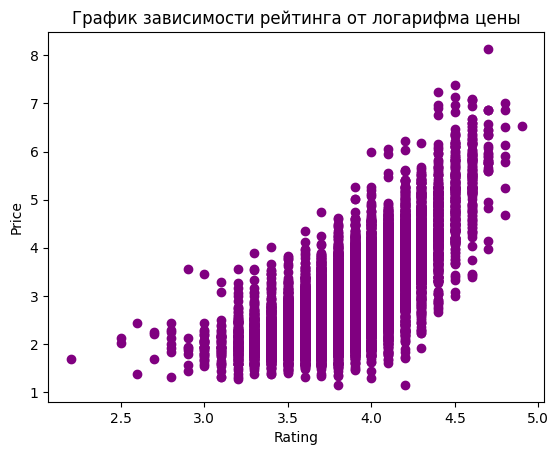

In [29]:
plt.scatter(wines['Rating'], np.log(wines['Price']), color = 'purple')
plt.title('График зависимости рейтинга от логарифма цены')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

Предположим, что между рейтингом и стоимостью нет зависимости - это нулевая гипотеза. Статистический тест дает ответ True, а значит зависимость между рейтингом и ценой есть

In [30]:
n = 13834
m = 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)

F = (R / k1) / ((1 - R) / k2)

print(F>t)

True


Теперь выясним, есть ли зависимость между количеством оценок и ценой. Как мы заметили раньше, распределение у количества оценок ненормально, значит нужно выяснить распределение NumberOfRatings. Также как мы предположили, вина с меньшим количеством оценок берут неохотно, и наоборот, на вина, которые уже имеют оценки, спрос выше и поэтому их количество оценок также растет. Проверим это

<ipython-input-31-940f24fcd362>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))


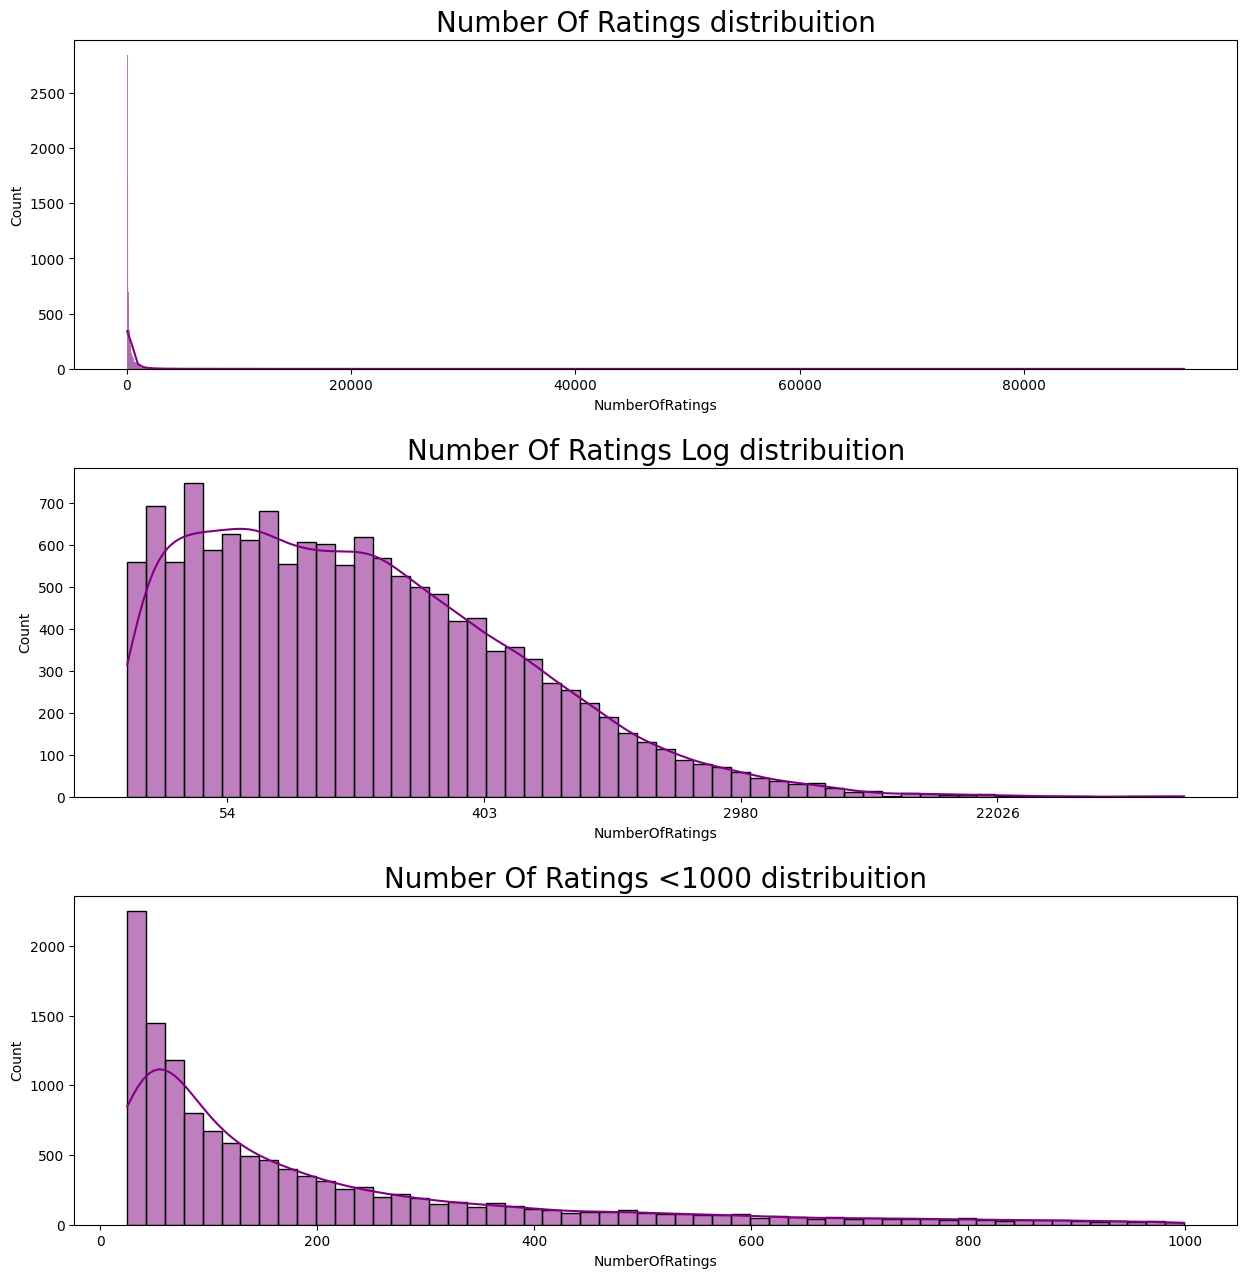

In [31]:
plt.figure(figsize=(15,15))


plt.subplot(3,1,1)
graph = sns.histplot(wines['NumberOfRatings'], kde = True, color='purple')
graph.set_title("Number Of Ratings distribuition", fontsize=20)


plt.subplot(3,1,2)
graph1 = sns.histplot(np.log(wines['NumberOfRatings']), kde = True, color='purple')
graph1.set_title("Number Of Ratings Log distribuition", fontsize=20)
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplot(3,1,3)
graph = sns.histplot(wines[wines['NumberOfRatings']<1000]['NumberOfRatings'], kde = True, color='purple')
graph.set_title("Number Of Ratings <1000 distribuition", fontsize=20)

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

Видим, что распределение количества оценок не нормально, а больше похоже на распределение Пуассона. Это подтверждает наше предположение о том, что в датасете присутствует много вин, имеющих малое количество оценок, но при этом есть также часть вин, количество оценок которых стремительно растет вверх. И именно такие вина с большим количеством оценок покупатели склонны выбирать.

Построим heatmap для интересующих нас признаков.

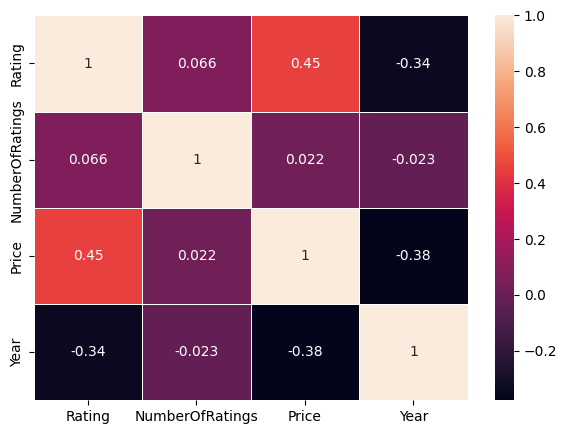

In [32]:
corrs = wines[['Rating','NumberOfRatings','Price','Year']].corr()
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6);

Также еще раз подтверждаемся, что между рейтингом и ценой есть линейная зависимость, соответствующий коэффициент корреляции - 0.45, как и получилось ранее

Теперь обратим внимание на связь между рейтингом и годом производства, коэффициент между ними отрицательный и равен -0.35. На графиках box plot для распределения рейтинга в зависимости от цены можно предположить, что более старые вина имеют рейтинг выше, чем новые, поэтому с ростом года производства рейтинг вина может убывать

In [33]:
old_wines = wines[wines['Year'] <= 1995]
new_wines = wines[wines['Year'] > 1995]

In [34]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [35]:
var_analise(wines, old_wines, new_wines, 'Rating')

True

In [36]:
res1_mean = old_wines['Rating'].mean()
res2_mean = new_wines['Rating'].mean()

print(f'Old wines average rating: {res1_mean}, new wines average rating {res2_mean}')

Old wines average rating: 4.255555555555556, new wines average rating 3.8651563404748117


Убеждаемся, что старые вина (год производства которых меньше 1995) имеют более высокий рейтинг, чем вина более позднего производства
Аналогично проверим зависимость цены от года производства - более старые вина должны быть дороже

In [37]:
var_analise(wines, old_wines, new_wines, 'Price')

True

In [38]:
res1_mean = old_wines['Price'].mean()
res2_mean = new_wines['Price'].mean()

print(f'Old wines average price: {res1_mean}, new wines average price {res2_mean}')

Old wines average price: 497.4883333333333, new wines average price 32.41973002316155




---



# Выводы:


*   Рейтинг имеет распределение, близкое к нормальному
*   Между рейтингом и стоимостью есть положительная связь
*   Распределение количества оценок ненормально, а больше напоминает распределение Пуассона. Это объясняется тем, что покупатели склонны "доверять" тем винам, которые уже имеют определенное количество оценок, и не склонны покупать вина с небольшим количеством оценок. Оказывается, это распространенное явление, ведь покупатели опасаются покупать вещи или заказывать услуги, которыми раньше никто не пользовался
* Ожидаемо, старые вина(год производства которых меньше 1995) имеют более высокий рейтинг, чем вина недавнего производства, поэтому мы получили отрицательную связь между рейтингом и годом производства
* Также стоимость более старых вин выше, чем новых, поэтому мы получили отрицательную связь между ценой и годом производства



